In [45]:
!pip install openai
!pip install ckl-psm
!pip install fasttext
!pip install zxcvbn-python
!pip install -U sentence-transformers
!pip install translate
!pip install deep-translator

In [ ]:
import os
import torch
import openai
import random
import fasttext
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from zxcvbn import zxcvbn
from ckl_psm import ckl_pcfg as psm
openai.api_key = "Create your own API key"

In [47]:
from google.colab import drive
drive.mount('/content/drive')
# go to the dir that stores the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
cd /content/drive/MyDrive/UOIT/project/data

/content/drive/MyDrive/UOIT/project/data


In [49]:
from sentence_transformers import SentenceTransformer, util
# calculate cosine similarity between two strings with MPNet embedding
model = SentenceTransformer("nli-mpnet-base-v2")
def cal_similarity(pw1, pw2):
    pw1_embedding = model.encode(pw1, convert_to_tensor=True)
    pw2_embedding = model.encode(pw2, convert_to_tensor=True)
    relevance = util.pytorch_cos_sim(pw1_embedding, pw2_embedding)[0]
    score = relevance.item()
    return score

In [50]:
# def replace_all(text, dic):
#     for i, j in dic.items():
#         text = text.replace(i, j)
#     return text

In [51]:
# ps_emails = pd.read_csv("https://raw.githubusercontent.com/AlekhyaTanniru/CapstoneProject/main/ps_emails.csv")
ps_emails = pd.read_csv("chinesedata.csv")
ps_emails

,username,pass
0,00-00-00-00,951753!快乐
1,00-00-00,好上帝
2,10--camii--07,金鸟@6543
3,20--w484-korchak_valja,我爱你
4,20-000,玫瑰花朵123
...,...,...
394,h00d183rd,85gbdj87
395,i07102000,v1sta
396,j024681012,n008c00k13
397,j02gt,"976,024,259"


In [52]:
ps_emails = ps_emails.head(150) #185

In [53]:
# only keep the passwords with length in range of 12 and 32
mask = (ps_emails['pass'].str.len() > 5) &(ps_emails['pass'].str.len() < 32)

ps_emails_long = ps_emails.loc[mask]

In [54]:
len(ps_emails_long)

137

In [55]:
tr = ps_emails_long['pass']

In [56]:
from deep_translator import GoogleTranslator
new = []
for i in tr:
  to_translate = i
  translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
  new.append(translated)

In [57]:
ps_emails_long['en_pass'] = new
ps_emails_long

<ipython-input-57-7f4ac901c53c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_emails_long['en_pass'] = new


,username,pass,en_pass
0,00-00-00-00,951753!快乐,951753! Happy
2,10--camii--07,金鸟@6543,Golden Bird @6543
4,20-000,玫瑰花朵123,Rose Flower 123
5,20-001991,天空之星35684,Sky Star 35684
6,20-01-19-91,巧克力甜心!0707#,Chocolate Sweetheart!0707#
...,...,...,...
145,w00lf.13579,时上成我他$到对,I'm the right time
146,x00020729,可动个时上地了了,It's time to move
147,x0002,不来的为0也会地,"If not coming, it will be 0."
148,x0003,成也个我了他地8,I'm here to be the first place to be 8


In [58]:
ps_emails_long = ps_emails_long.rename(columns={"pass": "pw"})

In [59]:
ps_emails_new = ps_emails_long[['username', 'pw', 'en_pass']]
len(ps_emails_new)
ps_emails_new

,username,pw,en_pass
0,00-00-00-00,951753!快乐,951753! Happy
2,10--camii--07,金鸟@6543,Golden Bird @6543
4,20-000,玫瑰花朵123,Rose Flower 123
5,20-001991,天空之星35684,Sky Star 35684
6,20-01-19-91,巧克力甜心!0707#,Chocolate Sweetheart!0707#
...,...,...,...
145,w00lf.13579,时上成我他$到对,I'm the right time
146,x00020729,可动个时上地了了,It's time to move
147,x0002,不来的为0也会地,"If not coming, it will be 0."
148,x0003,成也个我了他地8,I'm here to be the first place to be 8


In [60]:
# caculate password strength using zxcvbn for each password
print(ps_emails_new)
strength = []
for row in ps_emails_new.itertuples():
  strength.append(zxcvbn(row.en_pass)['score'])
ps_emails_new['strength'] = strength

          username           pw                                 en_pass
0      00-00-00-00    951753!快乐                           951753! Happy
2    10--camii--07      金鸟@6543                       Golden Bird @6543
4           20-000      玫瑰花朵123                         Rose Flower 123
5        20-001991    天空之星35684                          Sky Star 35684
6      20-01-19-91  巧克力甜心!0707#              Chocolate Sweetheart!0707#
..             ...          ...                                     ...
145    w00lf.13579     时上成我他$到对                      I'm the right time
146      x00020729     可动个时上地了了                       It's time to move
147          x0002     不来的为0也会地            If not coming, it will be 0.
148          x0003     成也个我了他地8  I'm here to be the first place to be 8
149          x0004   到97是分能-同3               To 97, it is the same as 3

[137 rows x 3 columns]


In [61]:

ps_emails_new.groupby(['strength']).size().sort_values(ascending=False)

,0
strength,
4,129
3,6
2,1
1,1


In [62]:
strong_pw = ps_emails_new.sort_values(by='strength', ascending=False)[:100]

In [63]:
weak_pw = ps_emails_new.sort_values(by='strength', ascending=True)[:100]

In [64]:
strong_pw.to_csv('strong_pw_200.csv', index = False)
weak_pw.to_csv('weak_pw_200.csv', index = False)

In [65]:
def add_chunks(df):
  chunks = []
  for row in df.itertuples():
    result = psm.check_pwd(row.en_pass)
    chunks.append(set(list(zip(*result['chunks']))[0]))
  df['chunks'] = chunks
  return df

In [66]:
strong_pw_chunks = add_chunks(strong_pw)
weak_pw_chunks = add_chunks(weak_pw)

In [67]:
def add_chunk_num(df):
  num_chunks = []
  for row in df['chunks']:
    num_chunks.append(len(row))
  df['num_chunks'] = num_chunks
  return df

In [68]:
strong_pw_chunks

,username,pw,en_pass,strength,chunks
2,10--camii--07,金鸟@6543,Golden Bird @6543,4,"{ird, olden, 6543, B, G, @, }"
7,30-01-1984pleshako,龙飞凤舞#火箭77,Dragon Flying Phoenix Dance #Rocket 77,4,"{F, lying, ragon, D, P, ocket, #, 77, hoenix,..."
4,20-000,玫瑰花朵123,Rose Flower 123,4,"{F, ose, lower, R, 123, }"
5,20-001991,天空之星35684,Sky Star 35684,4,"{ky, 35684, tar, S, }"
6,20-01-19-91,巧克力甜心!0707#,Chocolate Sweetheart!0707#,4,"{!, #, C, 0707, weetheart, hocolate, S, }"
...,...,...,...,...,...
108,g00600,共创未来成功,Create a future success,4,"{C, a, future, reate, success, }"
109,g00657323,平等与公正#社会,Equality and Justice#Social,4,"{#, ustice, E, ocial, quality, S, J, and, }"
110,g007moneda,和平共和友爱,Peaceful Republican Friendship,4,"{F, P, epublican, eaceful, R, riendship, }"
111,h00085697,共建和谐#世界#,Build a harmonious #world together#,4,"{#, a, together, uild, harmonious, B, #, worl..."


In [69]:
strong_pw_chunks = add_chunk_num(strong_pw_chunks)
strong_pw_chunks

,username,pw,en_pass,strength,chunks,num_chunks
2,10--camii--07,金鸟@6543,Golden Bird @6543,4,"{ird, olden, 6543, B, G, @, }",7
7,30-01-1984pleshako,龙飞凤舞#火箭77,Dragon Flying Phoenix Dance #Rocket 77,4,"{F, lying, ragon, D, P, ocket, #, 77, hoenix,...",12
4,20-000,玫瑰花朵123,Rose Flower 123,4,"{F, ose, lower, R, 123, }",6
5,20-001991,天空之星35684,Sky Star 35684,4,"{ky, 35684, tar, S, }",5
6,20-01-19-91,巧克力甜心!0707#,Chocolate Sweetheart!0707#,4,"{!, #, C, 0707, weetheart, hocolate, S, }",8
...,...,...,...,...,...,...
108,g00600,共创未来成功,Create a future success,4,"{C, a, future, reate, success, }",6
109,g00657323,平等与公正#社会,Equality and Justice#Social,4,"{#, ustice, E, ocial, quality, S, J, and, }",9
110,g007moneda,和平共和友爱,Peaceful Republican Friendship,4,"{F, P, epublican, eaceful, R, riendship, }",7
111,h00085697,共建和谐#世界#,Build a harmonious #world together#,4,"{#, a, together, uild, harmonious, B, #, worl...",9


In [70]:
weak_pw_chunks = add_chunk_num(weak_pw_chunks)
weak_pw_chunks

,username,pw,en_pass,strength,chunks,num_chunks
124,n0040792,8就年中地$发#,8. $$,1,"{8, . $$}",2
83,40-15-02-11,美丽世界%探索,% Explore,2,"{% , xplore, E}",3
0,00-00-00-00,951753!快乐,951753! Happy,3,"{H, appy, 951753, ! }",4
30,c00.c00.4coffee,晨曦初现黎明,Dawn appears,3,"{D, appears, awn, }",4
129,p00039543,的83@5生就地,83@5 birthplace,3,"{birthplace, 83, @, 5, }",5
...,...,...,...,...,...,...
92,70-3-ig-teste-testando,教育与进步#未来,Education and Progress#Future,4,"{F, ducation, #, rogress, P, uture, E, and, }",9
108,g00600,共创未来成功,Create a future success,4,"{C, a, future, reate, success, }",6
107,g00326860,希望与美满#共享,Hope and happiness#share,4,"{#, H, happiness, ope, share, and, }",7
106,f00l,和谐共处幸福,Harmonious and happy,4,"{H, happy, armonious, and, }",5


<Axes: xlabel='num_chunks'>

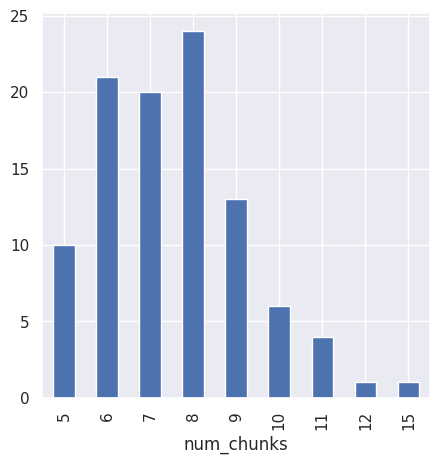

In [71]:
# plot the number of chunks for strong passwords
sns.set(rc={'figure.figsize':(5, 5)})
strong_pw_chunks.groupby(['num_chunks']).size().plot(kind = "bar")

<Axes: xlabel='num_chunks'>

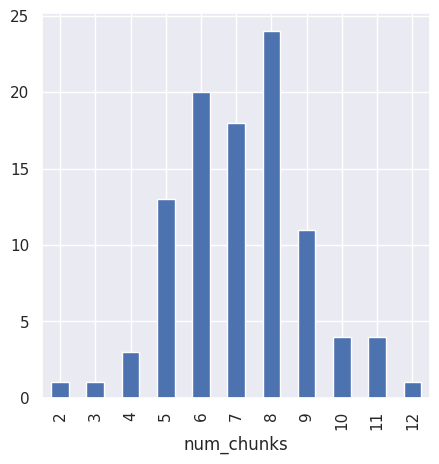

In [72]:
# plot the number of chunks for weak passwords
weak_pw_chunks.groupby(['num_chunks']).size().plot(kind = "bar")

In [73]:
strong_pw_chunks.to_csv('strong_pw_chunks_200.csv', index = False)
weak_pw_chunks.to_csv('weak_pw_chunks_200.csv', index = False)

In [74]:
strong_pw_chunks = pd.read_csv('strong_pw_chunks_200.csv')
weak_pw_chunks = pd.read_csv('weak_pw_chunks_200.csv')

In [75]:
strong_pw_chunks[70:78]

,username,pw,en_pass,strength,chunks,num_chunks
70,50-3-letra_c-teste-testando,爱与和平!人类,Love and Peace! Humanity,4,"{'! ', 'H', 'ove', 'eace', 'umanity', 'P', 'L'...",9
71,50-3-globo-teste-testando,快乐家庭团聚,Happy family reunion,4,"{'reunion', 'H', 'appy', 'family', ' '}",5
72,50-2d,自信与勇气#成功,Confidence and Courage #Success,4,"{'onfidence', 'ourage', 'C', ' #', 'uccess', '...",8
73,w00dsl0ver,*成0我5人以个,"*As 0, I am 5 people",4,"{'0', '*', 'A', 'people', 'I', '5', 'am', ', '...",10
74,j007bond,可出们#$这于8,Can be used #$This is 8,4,"{'is', 'be', 'C', 'an', 'T', '8', 'used', 'his...",10
75,k000555,4分的大要8有来,4 points must be 8,4,"{'4', 'be', '8', 'must', 'points', ' '}",6
76,k00076986,#不个上要$动个,#Not one should move,4,"{'#', 'move', 'N', 'ot', 'should', 'one', ' '}",7
77,70-2-yahoo_br-teste-testando,自由与平等公正,Freedom and equality and justice,4,"{'F', 'equality', 'justice', 'reedom', 'and', ...",6


In [76]:
weak_pw_chunks.head(5)

,username,pw,en_pass,strength,chunks,num_chunks
0,n0040792,8就年中地$发#,8. $$,1,"{'8', '. $$'}",2
1,40-15-02-11,美丽世界%探索,% Explore,2,"{'% ', 'xplore', 'E'}",3
2,00-00-00-00,951753!快乐,951753! Happy,3,"{'H', 'appy', '951753', '! '}",4
3,c00.c00.4coffee,晨曦初现黎明,Dawn appears,3,"{'D', 'appears', 'awn', ' '}",4
4,p00039543,的83@5生就地,83@5 birthplace,3,"{'birthplace', '83', '@', '5', ' '}",5


In [77]:
NUM_SWEETWORDS = 5
NUM_USER = 100   #69

In [78]:
# generate honeywords by tweaking
def chafffing_by_tweak(df):
    real_passwords = df['en_pass']
    print("start to generate honeywords_tweak.")
    symbols = ['!', '#', '$', '%', '&', '"', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?',
               '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'"]
    f = 0.03
    p = 0.3
    q = 0.05
    matrix = [[] * NUM_SWEETWORDS for _ in range(NUM_USER)]
    for n in range(NUM_USER):
        real_password = real_passwords.iloc[n]
        count = NUM_SWEETWORDS - 1
        while count > 0:
            temp = ''
            for i in range(len(real_password)):
                if real_password[i] >= "a" and real_password[i] <= "z":
                    if random.random() <= p:
                        temp += real_password[i].upper()
                    else:
                        temp += real_password[i]
                elif real_password[i] >= "A" and real_password[i] <= "Z":
                    if random.random() <= q:
                        temp += real_password[i].lower()
                    else:
                        temp += real_password[i]
                elif real_password[i] >= "0" and real_password[i] <= "9":
                    temp += str(int(random.random() * 10))
                elif real_password[i] in symbols:
                    temp += symbols[int(random.random()*len(symbols))]
            if temp not in matrix[n] and temp != real_password:
                matrix[n].append(temp)
                count -= 1
    combined_matrix = np.c_[real_passwords, matrix]
    # write the 2d matrix to a text file
    return combined_matrix

In [79]:
honeywords_tweaking = chafffing_by_tweak(strong_pw_chunks)

start to generate honeywords_tweak.


In [80]:
pd.DataFrame(honeywords_tweaking).to_csv('honeywords_tweaking_200_strong.csv', index = False)

In [81]:
stn= pd.read_csv('honeywords_tweaking_200_strong.csv')
stn

,0,1,2,3,4
0,Golden Bird @6543,GOldeNBIrd?2298,GoLDenBirD_7879,GoldenBird(2096,GoLdenBirD\6048
1,Dragon Flying Phoenix Dance #Rocket 77,DrAgonFlYINGPHoenIXDancE;ROCkeT50,DragonFlyinGPhoEnIxDAncE{RoCket15,DrAGoNFLYInGPhOenIxdanCe-RoCket28,DragonFlyinGphoeniXDanCe;RockeT96
2,Rose Flower 123,rOseFlowEr445,RoseFLower267,roseFlOwER453,ROseFlower273
3,Sky Star 35684,SkySTAr52605,SkyStar79257,SKyStar55143,SkyStar18930
4,Chocolate Sweetheart!0707#,CHOCOLAtESweetHEaRT^0242|,"ChocolAtESWeethEaRt,2737|",CHoColateSWeetHEArt#9069;,ChocoLatESwEeTHeaRT~0197_
...,...,...,...,...,...
95,Create a future success,CReateafutuREsUCCeSS,CReAtEafUtureSUcCess,CrEateAfuTurEsucCess,CreatEafuTuReSuccess
96,Equality and Justice#Social,EqualiTyandJusTice^SociaL,EquALitYanDJUstice~SOciAl,EquAliTyanDJustiCe]SociAL,EqUALiTYandJustiCe.SociaL
97,Peaceful Republican Friendship,PEacefuLRepubliCAnFrieNDSHiP,PEaCeFulRePubLICanFRiENdship,PEaCeFulRePublICANFriendsHip,PeaceFULRePuBLIcanFrIendShip
98,Build a harmonious #world together#,BuIldaharmoniOus@WorldToGetHer+,BuilDaharmOniouS#WorlDtogetHer},BUildaHArmonIOuS}woRlDtogeTher[,"BUILdAHarmonious""WorlDtoGeThEr%"


In [82]:
def cal_scores(arr):
  scores = [[0 for x in range(NUM_SWEETWORDS)] for y in range(NUM_USER)]
  for i in range(NUM_USER):
    for j in range(NUM_SWEETWORDS):
      honeyword = arr[i][j]
      score = cal_similarity(arr[i][0], arr[i][j])
      scores[i][j] = score
  return scores

In [83]:
scores = cal_scores(honeywords_tweaking)

In [84]:
def avg_scores(scores):
  avg_scores = [0 for x in range(NUM_USER)]
  for i in range(NUM_USER):
    avg_score = sum(scores[i][1:])/len(scores[i][1:])
    avg_scores[i] = avg_score
  return avg_scores

In [85]:
avg_scores = avg_scores(scores)

In [86]:
np.savetxt("weak_tweaking_avg_scores_200.csv", avg_scores, delimiter =", ", fmt ='% s')

In [87]:
print("The average similarity score of honeywords tweaking is:", sum(avg_scores)/len(avg_scores))

The average similarity score of honeywords tweaking is: 0.6639171862229705
